# Age Estimation 

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/project10
import py_compile
py_compile.compile(r'helperP.py')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/project10


'__pycache__/helperP.cpython-36.pyc'

In [0]:
import numpy as np
import os
from math import * 
from helperP import *

# Loading Data

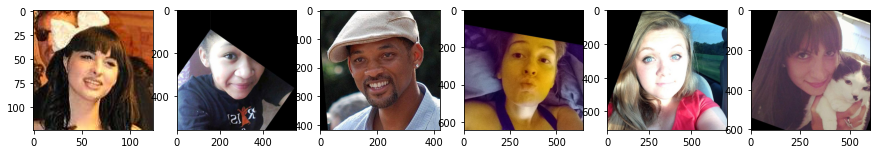

In [3]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)
age_val, features_val = prepare_data('val', base_dir)
_, features_test = prepare_data('test', base_dir)
show_data(base_dir)


## Linear class
	LINEAR
	Implementation of the linear layer (also called fully connected layer)
	which performs linear transoformation on input data y = xW + b.
	This layer has two learnable parameters, weight of shape (input_channel, output_channel)
	and bias of shape (output_channel), which are specified and initalized in init_param()
	function. In this assignment, you need to implement both forward and backward computation
	Arguments:
		input_channel  -- integer, number of input channels
		output_channel -- integer, number of output channels

In [0]:
class Linear(object):

	def __init__(self, input_channel, output_channel):
		self.input_channel = input_channel
		self.output_channel = output_channel
		self.init_param()

	def init_param(self):
		self.weight = (np.random.randn(self.input_channel,self.output_channel) * sqrt(2.0/(self.input_channel+self.output_channel))).astype(np.float32)
		self.bias = np.zeros((self.output_channel))

	'''
		Forward computation of linear layer, you may want to save some intermediate
		variable to class membership (self.) for reusing in backward computation.
		Arguments:
			input -- numpy array of shape (N, input_channel)

		Output:
			output -- numpy array of shape (N, output_channel)
	'''
	def forward(self, input):
		self.input = input
		output = np.dot(input, self.weight) + self.bias[None,:]
		return output

	'''
		Backward computation of linear layer, you need to compute the gradient
		w.r.t input, weight and bias respectively. You need to reuse the variable in forward
		computation to compute backward gradient.

		Arguments:
			grad_output -- numpy array of shape (N, output_channel)

		Output:
			grad_input -- numpy array of shape (N, input_channel), gradient w.r.t input
			grad_weight -- numpy array of shape (input_channel, output_channel), gradient w.r.t weight
			grad_bias --  numpy array of shape (output_channel), gradient w.r.t bias
	'''
	def backward(self, grad_input):
		grad_bias = np.sum(grad_input, axis = 0)
		grad_weight = self.input.T.dot(grad_input)
		grad_output = grad_input.dot(self.weight.T)
		return grad_output, grad_weight, grad_bias

## CROSS_ENTROPY_LOSS_WITH_SOFTMAX
	Implementation of the combination of softmax function and cross entropy loss.
	In classification task, we usually firstly apply softmax to map class-wise prediciton
	into the probabiltiy distribution then we use cross entropy loss to maximise the likelihood
	of ground truth class's prediction. Since softmax includes exponential term and cross entropy includes
	log term, we can simplify the formula by combining these two functions togther so that log and exp term could cancell out
	mathmatically and we can avoid precision lost with float point numerical computation.
	If we ignore the index on batch sizel and assume there is only one grouth truth per sample,
	the formula for softmax and cross entropy loss are:
		Softmax: prob[i] = exp(x[i]) / \sum_{j}exp(x[j])
		Cross_entropy_loss:  - 1 * log(prob[gt_class])
	Combining these two function togther, we got
		cross_entropy_with_softmax: -x[gt_class] + log(\sum_{j}exp(x[j]))
	In this assignment, you will implement both forward and backward computation.
	Arguments:
		None

In [0]:
class CrossEntropyLossWithSoftmax(object):
	def __init__(self):
		pass
	'''
		Forward computation of cross entropy with softmax, you may want to save some intermediate variables to class membership (self.)
		Arguments:
			input    -- numpy array of shape (N, C), the prediction for each class, where C is number of class
			gt_label -- numpy array of shape (N), it's a integer array and the value range from 0 to C-1 which
						specify the ground truth class for each input
		Output:
			output   -- numpy array of shape (N), containing the cross entropy loss on each input
	'''
	def forward(self, input, gt_label):
		exp = np.exp(input)
		self.gt_label = gt_label
		self.prob = exp / np.sum(exp, axis = -1)[:,None]
		log_term = np.log(np.sum(exp, axis = -1))
		output = -input[np.arange(input.shape[0]), gt_label] + log_term
		return output

	'''
		Backward computation of cross entropy with softmax. It's recommended to resue the variable
		in forward computation to simplify the formula.
		Arguments:
			grad_output -- numpy array of shape (N)

		Output:
			output   -- numpy array of shape (N, C), the gradient w.r.t input of forward function
	'''
	def backward(self, grad_output):
		self.prob[np.arange(self.prob.shape[0]),self.gt_label] -= 1
		return grad_output[:,None] * self.prob

## RELU
	Implementation of relu (rectified linear unit) layer. Relu is the no-linear activating function that
	set all negative values to zero and the formua is y = max(x,0).
	This layer has no learnable parameters and you need to implement both forward and backward computation
	Arguments:
		None

In [0]:
class ReLU(object):
	def __init__(self):
		pass
	'''
		Forward computation of relu and you may want to save some intermediate variables to class membership (self.)
		Arguments:
			input -- numpy array of arbitrary shape

		Output:
			output -- numpy array having the same shape as input.
	'''
	def forward(self, input):
		self.input = input
		return np.maximum(input, 0)

	'''
		Backward computation of relu, you can either in-place modify the grad_output or create a copy.
		Arguments:
			grad_output-- numpy array having the same shape as input

		Output:
			grad_input -- numpy array has the same shape as grad_output. gradient w.r.t input
	'''
	def backward(self, grad_output):
		grad_input = grad_output.copy()
		grad_output[self.input<0] = 0
		return grad_input

# Implement Stochastic Gradient descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [0]:
def stochastic_gradient_descent(age, feature, age_val, feature_val):
    # check the inputs
    assert len(age) == len(feature)

    # Set the random seed
    np.random.seed(0)
    
    # Set the learning rate
    lr = 1e-3
    
    # Set the momentum term
    alpha = 0.9    
    
    # Set the hidden layers (You can tune this parameter for better performance)
    num_lat = 128

    # Define the net with the python layers
    fc0 = Linear(2048, num_lat)
    relu0 = ReLU()
    fc1 = Linear(num_lat,101)
    model = [fc0, relu0, fc1]
    cretirion = CrossEntropyLossWithSoftmax()

    # Initialize parameters of the layers
    fc0.init_param()
    fc1.init_param()

    # Number of mini-batches
    t = len(age) // batch_size

    # Optimal weights and loss for val
    model_opt = {'fc0_weight': fc0.weight, 'fc0_bias' : fc0.bias,
           'fc1_weight': fc1.weight, 'fc1_bias'  : fc1.bias}
    loss_opt = 1e6
    
    # Initialize the descent direction
    v = {'fc0_weight': np.zeros_like(fc0.weight), 'fc0_bias' : np.zeros_like(fc0.bias),
         'fc1_weight': np.zeros_like(fc1.weight), 'fc1_bias' : np.zeros_like(fc1.bias)}
    
    for e in range(epoch_sgd):
        # Shuffle training data
        n = np.random.permutation(len(feature))

        loss_train = []
        for m in range(t):
            # Providing mini batch with fixed batch size of 16
            batch_feature = feature[n[m * batch_size: (m + 1) * batch_size]]
            batch_age = age[n[m * batch_size: (m + 1) * batch_size]].reshape(-1, 1).astype(np.int16).squeeze()

            ##########################################################################
            # TODO: YOUR CODE HERE
            ##########################################################################
            # forward pass
            z1 = fc0.forward(batch_feature)
            a1 = relu0.forward(z1)
            z2 = fc1.forward(a1)
            ce = cretirion.forward(z2, batch_age)
            loss = ce.mean()
            loss_train.append(ce)

            
            ##########################################################################
            # TODO: YOUR CODE HERE
            ##########################################################################
            # calculate gradient here
            dz2 = cretirion.backward(np.ones_like(ce) * 1 / len(batch_age))
            da1, dw1, db1 = fc1.backward(dz2)
            dz1 = relu0.backward(da1)
            dinput, dw0, db0 = fc0.backward(dz1)
            

            ##########################################################################
            # TODO: YOUR CODE HERE
            ##########################################################################               
            # calculate the gradient with momentum, momentum term is given by alpha
            '''
             if(e ==0 & m==0):
                u['fc1_weight'] = dweight1
                u['fc1_bias']   = dbias1
                u['fc2_weight'] = dweight2
                u['fc2_bias']   = dbias2
            else:           
            '''
            v['fc0_weight'] = v['fc0_weight'] * alpha + lr * dw0
            v['fc0_bias']   = v['fc0_bias']   * alpha + lr * db0
            v['fc1_weight'] = v['fc1_weight'] * alpha + lr * dw1
            v['fc1_bias']   = v['fc1_bias']   * alpha + lr * db1                 
            
            
            ##########################################################################
            # TODO: YOUR CODE HERE
            ##########################################################################                
            # update the parameters
            fc0.weight -= v['fc0_weight']
            fc0.bias   -= v['fc0_bias']
            fc1.weight -= v['fc1_weight']
            fc1.bias   -= v['fc1_bias']

        ##########################################################################
        # TODO: YOUR CODE HERE
        ##########################################################################                 
        # calcualte the mean absolute error on validation set
        z_val = features_val
        for k in range(len(model)):
            z_val = model[k].forward(z_val)
        a_val = np.exp(z_val)
        p_val = a_val / np.sum(a_val, axis=-1)[:, None]
        pred_val = np.dot(p_val, np.arange(0, 101).reshape(-1, 1))    
        loss_val = np.abs(pred_val.reshape(-1,1) - age_val.reshape(-1,1)).mean()
        
        #loss_val = cretirion.forward(z_val, age_val.astype(np.int16)).mean()
        #print(loss_val)

        ##########################################################################
        # TODO: YOUR CODE HERE
        ##########################################################################  
        # update the optimal model w.r.t. the error
        if (loss_opt > loss_val):
            print('updated:')
            loss_opt = loss_val
            model_opt['fc0_weight'] = fc0.weight
            model_opt['fc0_bias']   = fc0.bias
            model_opt['fc1_weight'] = fc1.weight
            model_opt['fc1_bias']   = fc1.bias

        print('=> epoch:', e + 1, ' Validation MAE Loss:', round(loss_val, 4), 'Training Loss:', round(np.array(loss_train).mean(),4))
    return model_opt

# Train and validate

updated:
=> epoch: 1  Validation MAE Loss: 10.2939 Training Loss: 4.1065
updated:
=> epoch: 2  Validation MAE Loss: 7.0444 Training Loss: 3.4754
updated:
=> epoch: 3  Validation MAE Loss: 6.1265 Training Loss: 3.2044
updated:
=> epoch: 4  Validation MAE Loss: 5.6882 Training Loss: 3.0444
updated:
=> epoch: 5  Validation MAE Loss: 5.4238 Training Loss: 2.9339
updated:
=> epoch: 6  Validation MAE Loss: 5.2558 Training Loss: 2.8632
updated:
=> epoch: 7  Validation MAE Loss: 5.1685 Training Loss: 2.8031
updated:
=> epoch: 8  Validation MAE Loss: 5.0883 Training Loss: 2.7601
updated:
=> epoch: 9  Validation MAE Loss: 5.0247 Training Loss: 2.7332
updated:
=> epoch: 10  Validation MAE Loss: 4.9958 Training Loss: 2.7063
updated:
=> epoch: 11  Validation MAE Loss: 4.9645 Training Loss: 2.683
updated:
=> epoch: 12  Validation MAE Loss: 4.9491 Training Loss: 2.6725
updated:
=> epoch: 13  Validation MAE Loss: 4.938 Training Loss: 2.6568
updated:
=> epoch: 14  Validation MAE Loss: 4.9163 Training L

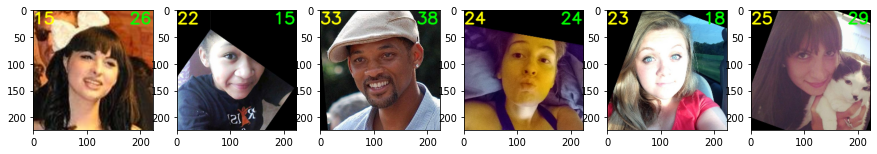

In [9]:
model_opt = stochastic_gradient_descent(age_train, features_train, age_val, features_val)
loss = evaluate_hidden([model_opt['fc0_weight'], model_opt['fc1_weight']], 
                        [model_opt['fc0_bias'],   model_opt['fc1_bias']], 
                        age_val, features_val)
print("Your mean absolute error for validation set is:", round(loss, 3))

# Test and Generate results file

In [10]:
prediction = test_hidden([model_opt['fc0_weight'], model_opt['fc1_weight']], 
            [model_opt['fc0_bias'],   model_opt['fc1_bias']], 
            features_test, filename='sgd_hidden.txt')
print("Test results has saved to sgd_hidden.txt")
print(prediction[:10])

Test results has saved to sgd_hidden.txt
[25.40615225 62.64810713 50.18372943 21.24937606 31.50999537 34.70905546
 47.33114949 41.07503275 21.87585476 57.52009814]
